In [1]:
import os, sys
import pandas as pd


# Zakładam, że folder 'scripts' jest na tym samym poziomie co 'notebooks'
scripts_path = os.path.abspath(os.path.join('..', 'scripts'))
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Teraz możesz importować moduł
from pom import *

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped 

In [2]:
from pom import TASKS
print("No of tasks: ", len(TASKS))

No of tasks:  138


In [3]:
input_file = 'curated_GS_LF_merged_4983.csv' 
dataset = pd.read_csv(input_file)
dataset

,curated_GS_LF_merged_4983nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,O=c1[nH]cnc2c1ncn2C1OC(COP(=O)([O-])[O-])C(O)C...,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4979,Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4980,Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4981,CCC1SC(C)=NC(C)S1,alliaceous,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# featurizer = GraphFeaturizer()

dataset = make_dataset()

n_tasks = len(dataset.tasks)
len(dataset)

4983

In [5]:
# get train valid test splits

randomstratifiedsplitter = dc.splits.RandomStratifiedSplitter()
train_dataset, test_dataset, valid_dataset = randomstratifiedsplitter.train_valid_test_split(dataset, frac_train = 0.8, frac_valid = 0.1, frac_test = 0.1, seed = 1)

print("train_dataset: ", len(train_dataset))
print("valid_dataset: ", len(valid_dataset))
print("test_dataset: ", len(test_dataset))

train_dataset:  3999
valid_dataset:  498
test_dataset:  486


In [6]:
train_ratios = get_class_imbalance_ratio(train_dataset)
assert len(train_ratios) == n_tasks

In [7]:
learning_rate = dc.models.optimizers.ExponentialDecay(initial_rate=0.001, decay_rate=0.5, decay_steps=32*20, staircase=True)


In [8]:
# Ustaw parametry zgodnie z tymi z treningu!
model = MPNNPOMModel(
    n_tasks=n_tasks,  # liczba etykiet/zapachów
    batch_size=128,
    learning_rate=0.001,  # lub użyj ExponentialDecay, jeśli stosowałeś
    class_imbalance_ratio=train_ratios,
    loss_aggr_type='sum',
    node_out_feats=100,
    edge_hidden_feats=75,
    edge_out_feats=100,
    num_step_message_passing=5,
    mpnn_residual=True,
    message_aggregator_type='sum',
    mode='classification',
    number_atom_features=GraphConvConstants.ATOM_FDIM,
    number_bond_features=GraphConvConstants.BOND_FDIM,
    n_classes=1,
    readout_type='set2set',
    num_step_set2set=3,
    num_layer_set2set=2,
    ffn_hidden_list=[392, 392],
    ffn_embeddings=256,
    ffn_activation='relu',
    ffn_dropout_p=0.12,
    ffn_dropout_at_input_no_act=False,
    weight_decay=1e-5,
    self_loop=False,
    optimizer_name='adam',
    log_frequency=32,
    model_dir='./experiments',  # katalog, gdzie są checkpointy
    device_name='cpu'  # lub 'cpu'
)

In [9]:
model.restore('experiments/checkpoint2.pt')

c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\sklearn\cluster\_kmea

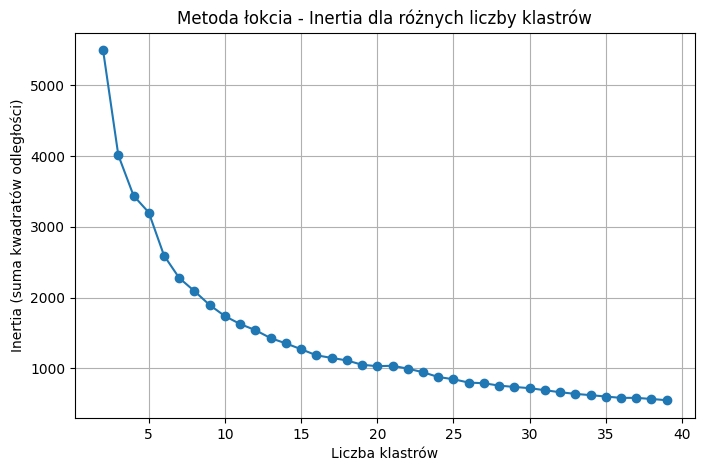

In [62]:
inertia = []

range_n_clusters = list(range(2, 40))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(mean_embeddings)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Metoda łokcia - Inertia dla różnych liczby klastrów')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inertia (suma kwadratów odległości)')
plt.grid(True)
plt.show()


c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


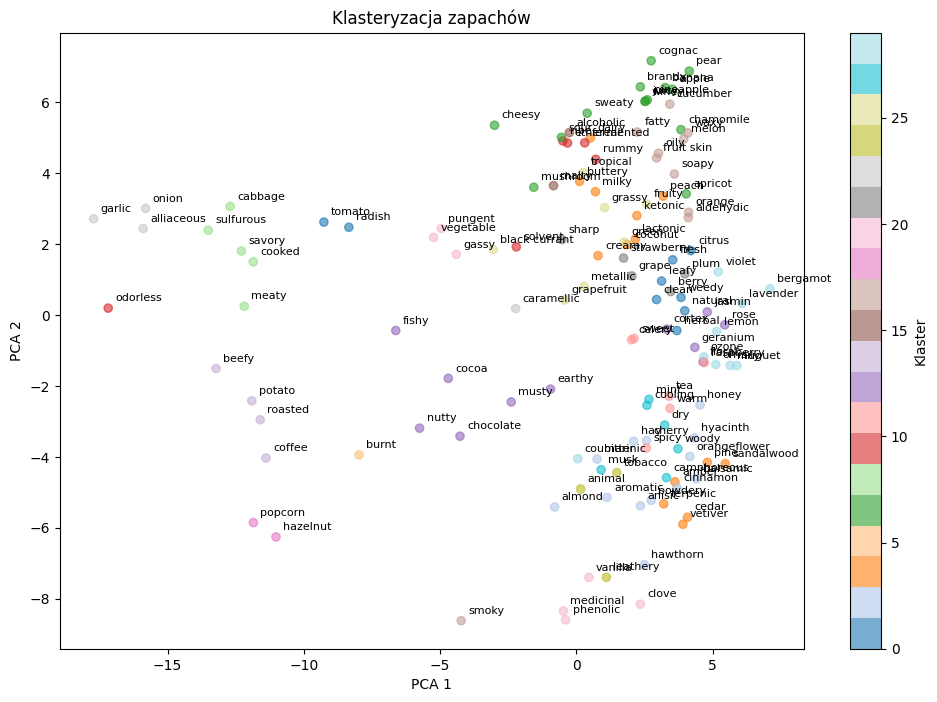

In [54]:
pom_embeds = model.predict_embedding(dataset) 


import numpy as np
mean_embeddings = []
for i in range(len(dataset.tasks)):
    idx = np.where(dataset.y[:, i] == 1)[0]
    if len(idx) > 0:
        mean_emb = np.mean(pom_embeds[idx], axis=0)
    else:
        mean_emb = np.zeros(pom_embeds.shape[1])
    mean_embeddings.append(mean_emb)
mean_embeddings = np.array(mean_embeddings)

# Klasteryzacja
from sklearn.cluster import KMeans
n_clusters = 30
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(mean_embeddings)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embeds_2d = pca.fit_transform(mean_embeddings)

# Rysowanie
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
scatter = plt.scatter(embeds_2d[:,0], embeds_2d[:,1], c=clusters, cmap='tab20', alpha=0.6)

for i, label in enumerate(dataset.tasks):
    plt.annotate(label, (embeds_2d[i,0], embeds_2d[i,1]), fontsize=8, xytext=(5,5), textcoords='offset points')

plt.colorbar(scatter, label='Klaster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Klasteryzacja zapachów')
plt.show()



In [55]:
def get_clusters_list(dataset_tasks, clusters):
    clustered_odors = {}
    for odor, cluster_id in zip(dataset_tasks, clusters):
        if cluster_id not in clustered_odors:
            clustered_odors[cluster_id] = []
        clustered_odors[cluster_id].append(str(odor))  # konwersja do zwykłego stringa, jeśli potrzeba

    clustered_lists = [clustered_odors[key] for key in sorted(clustered_odors.keys())]
    return clustered_lists

# Przykład użycia:
clustered_lists = get_clusters_list(dataset.tasks, clusters)

for i in clustered_lists:
    print(i)


['citrus', 'clean', 'fresh', 'herbal', 'leafy', 'natural', 'weedy']
['radish', 'tomato']
['almond', 'anisic', 'aromatic', 'balsamic', 'bitter', 'cherry', 'cinnamon', 'hawthorn', 'hay', 'honey', 'hyacinth', 'orangeflower', 'powdery']
['amber', 'cedar', 'pine', 'sandalwood', 'terpenic', 'vetiver']
['buttery', 'coconut', 'creamy', 'dairy', 'ketonic', 'lactonic', 'milky', 'peach']
['burnt']
['cheesy', 'mushroom', 'sour', 'sweaty']
['apple', 'apricot', 'banana', 'brandy', 'chamomile', 'cognac', 'juicy', 'pear', 'pineapple', 'winey']
['cabbage', 'cooked', 'meaty', 'savory', 'sulfurous']
['odorless']
['ethereal', 'fermented', 'ripe', 'rummy', 'solvent']
['celery', 'raspberry', 'spicy', 'sweet', 'tea', 'warm']
['chocolate', 'cocoa', 'earthy', 'fishy', 'musty', 'nutty']
['cortex', 'floral', 'geranium', 'jasmin', 'rose']
['beefy', 'coffee', 'potato', 'roasted']
['alcoholic', 'malty']
['smoky']
['aldehydic', 'cucumber', 'fatty', 'fruit skin', 'melon', 'oily', 'orange', 'soapy', 'waxy']
['hazelnut

In [63]:
def cluster_plot(model=model, dataset=dataset, is_preds=False):
    pom_embeds = model.predict_embedding(dataset)
    required_desc = list(dataset.tasks)

    # Definicje klastrów (tylko podzapachy)
    clusters = [
        {
            'name': 'odorless',
            'subs': ['odorless'],
            'color': '#B0B0B0'
        },
        {
            'name': 'coffee',
            'subs': ['coffee', 'hazelnut', 'popcorn', 'potato', 'roasted'],
            'color': '#8B5C2D'
        },
        {
            'name': 'animal',
            'subs': ['animal', 'leathery', 'tobacco'],
            'color': 'purple'
        },
        {
            'name':'phenolic',
            'subs':['clove', 'medicinal', 'phenolic', 'vanilla'],
            'color':'yellow'
        }, 
        {
            'name': 'cebula',
            'subs': ['alliaceous', 'garlic', 'onion'],
            'color': '#563464'
        }

    ]

    # PCA
    pca = PCA(n_components=2, iterated_power=10)
    reduced_features = pca.fit_transform(pom_embeds)

    # Wariancja
    variance_explained = pca.explained_variance_ratio_
    variance_pc1 = variance_explained[0]
    variance_pc2 = variance_explained[1]

    # Etykiety
    if is_preds:
        y_preds = model.predict(dataset)
        threshold = np.percentile(y_preds, 95, axis=0)
        y = (y_preds >= threshold).astype(int)
    else:
        y = dataset.y

    # Przygotowanie siatki KDE
    x_grid, y_grid = np.meshgrid(
        np.linspace(reduced_features[:, 0].min(), reduced_features[:, 0].max(), 800),
        np.linspace(reduced_features[:, 1].min(), reduced_features[:, 1].max(), 800)
    )
    grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()])

    # Funkcja KDE
    def get_kde_values(label):
        plot_idx = required_desc.index(label)
        label_indices = np.where(y[:, plot_idx] == 1)[0]
        if len(label_indices) == 0:
            return np.zeros(x_grid.shape)
        kde_label = gaussian_kde(reduced_features[label_indices].T)
        return kde_label(grid_points).reshape(x_grid.shape)

    # Rysowanie konturów
    def plot_cluster(cluster, bbox_to_anchor):
        legend_elements = []
        for sub in cluster['subs']:
            if sub in required_desc:  # Tylko istniejące etykiety
                plt.contour(x_grid, y_grid, get_kde_values(sub), 
                           levels=1, colors=cluster['color'], linewidths=2)
                legend_elements.append(Patch(facecolor=cluster['color'], label=sub))
        
        if legend_elements:
            legend = plt.legend(handles=legend_elements, title=cluster['name'], 
                               bbox_to_anchor=bbox_to_anchor)
            legend.get_frame().set_facecolor(cluster['color'])
            plt.gca().add_artist(legend)

    # Generowanie wykresu
    plt.figure(figsize=(25, 15))
    plt.title('KDE Density Estimation with Contours in Reduced Space')
    plt.xlabel(f'PC1 ({variance_pc1*100:.1f}%)')
    plt.ylabel(f'PC2 ({variance_pc2*100:.1f}%)')

    plot_cluster(clusters[0], (0.2, 0.8))
    plot_cluster(clusters[1], (0.9, 0.4))
    plot_cluster(clusters[2], (0.3, 0.1))
    plot_cluster(clusters[3], (0.3, 0.5))
    plot_cluster(clusters[4], (0.5, 0.8))

    plt.show()
    plt.close()


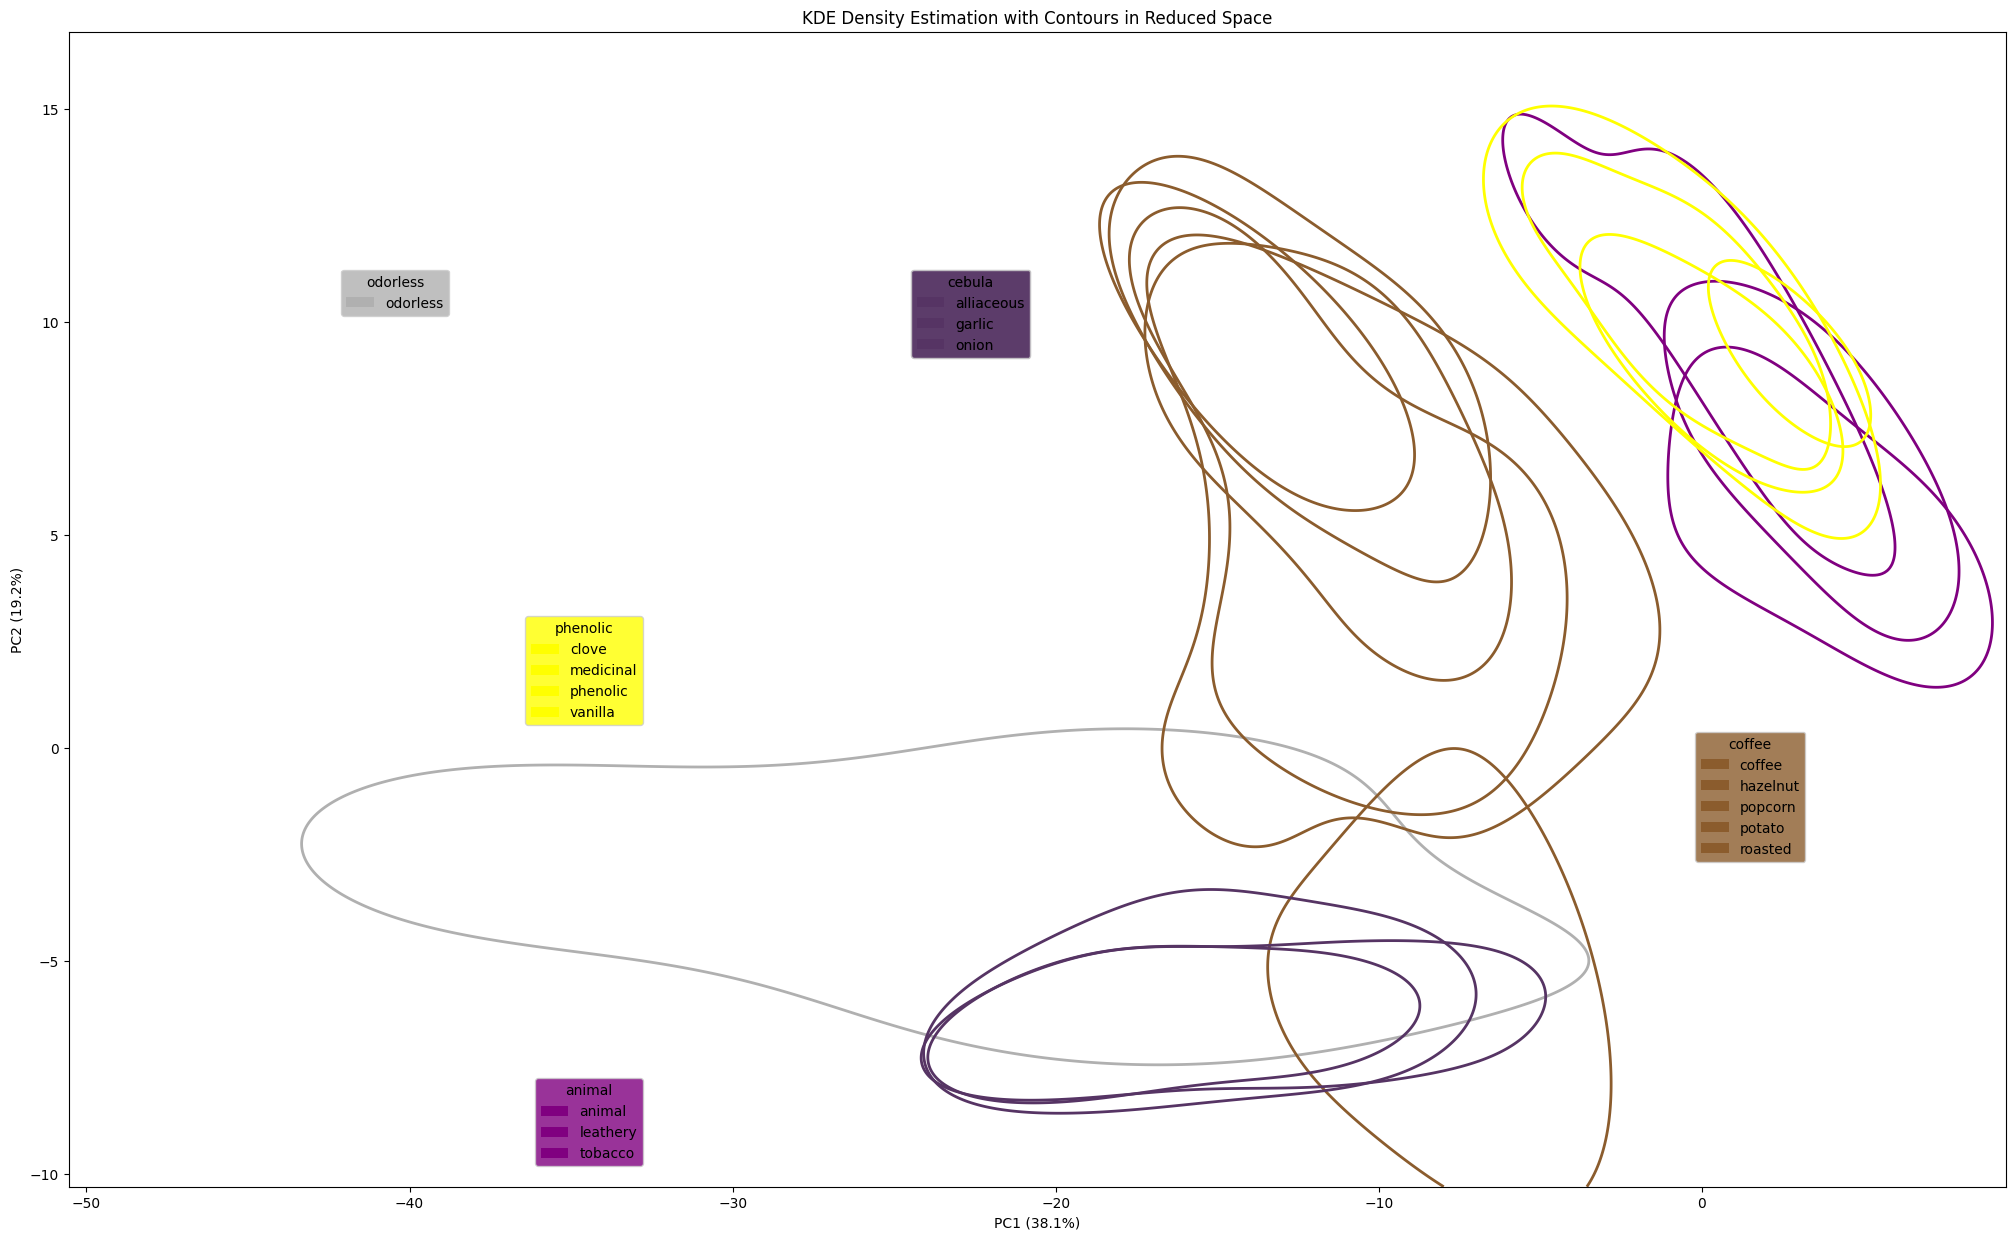

In [64]:
cluster_plot()